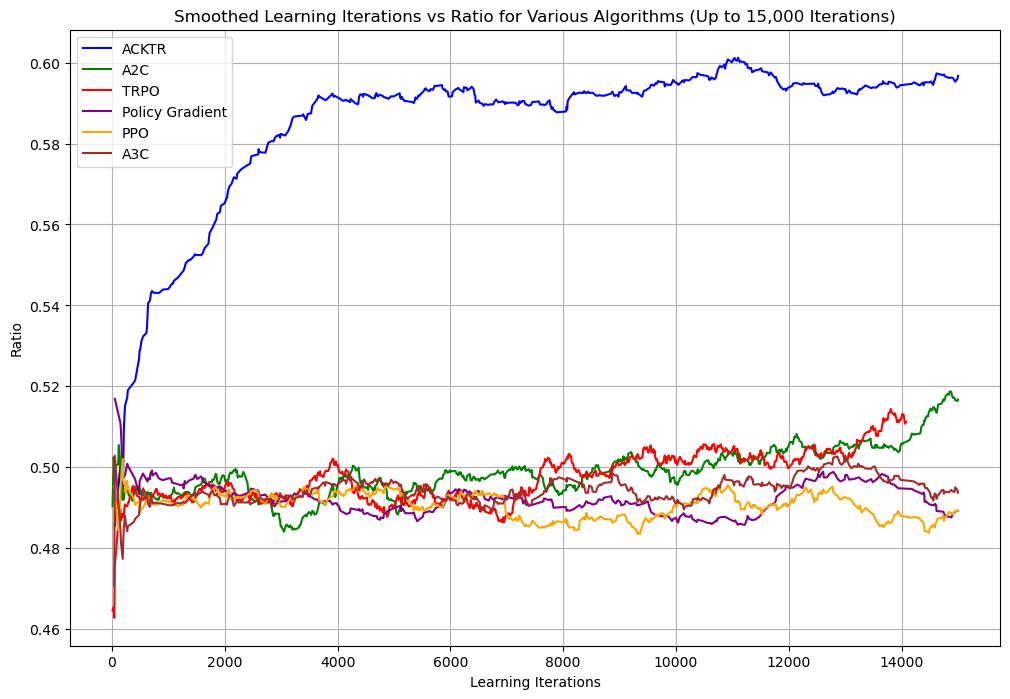

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # 이동 평균을 계산하기 위해 numpy 추가

# 파일 경로 설정
file_paths = [
    "PCT-0417_acktr-2024.04.19-09-19-53.csv",
    "PCT-0417_a2c_modelcompare_0215-2024.04.18-00-01-31.csv",
    "PCT-0417_trpo_modelcompare_0730-2024.04.18-10-38-37.csv",
    "PCT-0418_policy_gradient-2024.04.18-19-13-25.csv",
    "PCT-0418_ppo-2024.04.18-01-08-28.csv",
    "PCT-0418_a3c-2024.04.18-10-35-35.csv"
]

# 알고리즘 이름 및 색상 설정
algorithms = ["ACKTR", "A2C", "TRPO", "Policy Gradient", "PPO", "A3C"]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 이동 평균의 윈도우 크기 설정
window_size = 50

# 그래프 초기화
plt.figure(figsize=(12, 8))

# 데이터 로드 및 플롯
for file_path, algorithm, color in zip(file_paths, algorithms, colors):
    data = pd.read_csv(file_path)
    filtered_data = data[data['Step'] <= 15000]  # Step 값이 15000 이하인 데이터만 필터링

    # 이동 평균 계산
    if len(filtered_data) >= window_size:  # 데이터 길이가 윈도우 크기보다 클 경우에만 계산
        smoothed_values = filtered_data['Value'].rolling(window=window_size, min_periods=1).mean()
        plt.plot(filtered_data['Step'], smoothed_values, label=algorithm, color=color)
    else:
        plt.plot(filtered_data['Step'], filtered_data['Value'], label=algorithm, color=color)

# 제목과 범례
plt.title('Smoothed Learning Iterations vs Ratio for Various Algorithms (Up to 15,000 Iterations)')
plt.xlabel('Learning Iterations')
plt.ylabel('Ratio')
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

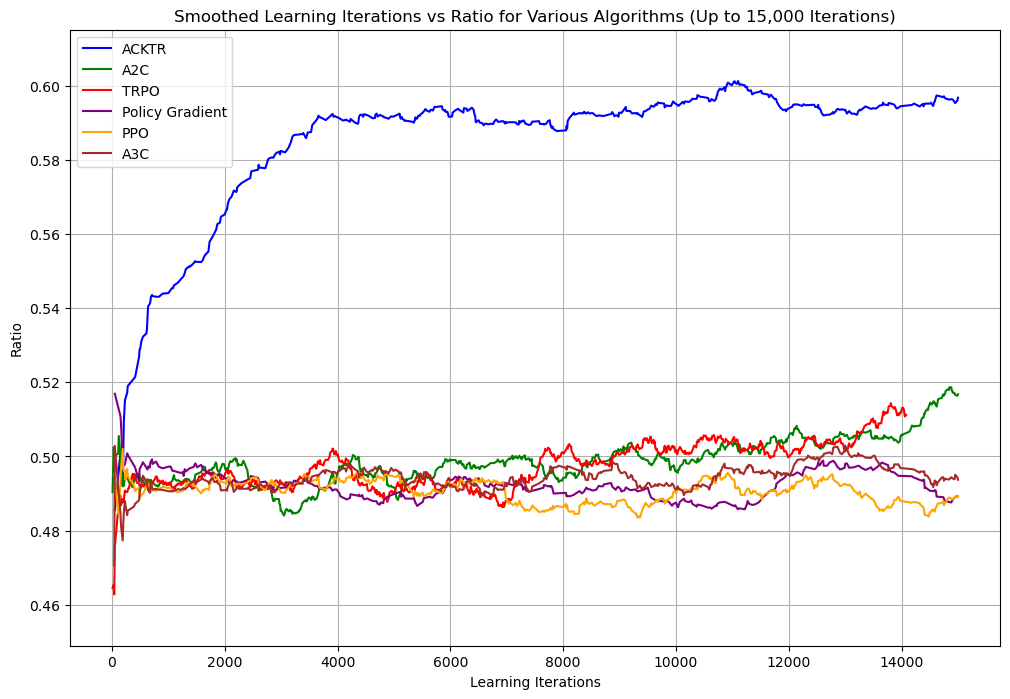

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 파일 경로 설정
file_paths = [
    "PCT-041-acktr-2024.04.19-09-19-53(2).csv",
    "PCT-0417_a2c_modelcompare_0215-2024.04.18-00-01-31 (1).csv",
    "PCT-0417_trpo_modelcompare_0730-2024.04.18-10-38-37 (1).csv",
    "PCT-0418-policy_gradient-2024.04.18-19-13-25(2).csv",
    "PCT-0418-ppo-2024.04.18-01-08-28(2)(1).csv",
    "PCT-0418a3c-2024.04.18-10-35-35(1)(1).csv"
]

# 알고리즘 이름 및 색상 설정
algorithms = ["ACKTR", "A2C", "TRPO", "Policy Gradient", "PPO", "A3C"]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 이동 평균의 윈도우 크기 설정
window_size = 50

# 그래프 초기화
plt.figure(figsize=(12, 8))

# y축 값 범위를 조절하기 위한 초기 설정
min_y, max_y = float('inf'), float('-inf')

# 데이터 로드 및 플롯
for file_path, algorithm, color in zip(file_paths, algorithms, colors):
    data = pd.read_csv(file_path)
    filtered_data = data[data['Step'] <= 15000]  # Step 값이 15000 이하인 데이터만 필터링

    # 이동 평균 계산
    if len(filtered_data) >= window_size:
        smoothed_values = filtered_data['Value'].rolling(window=window_size, min_periods=1).mean()
        plt.plot(filtered_data['Step'], smoothed_values, label=algorithm, color=color)
        # y축 최대/최소값 업데이트
        min_y = min(min_y, smoothed_values.min())
        max_y = max(max_y, smoothed_values.max())
    else:
        plt.plot(filtered_data['Step'], filtered_data['Value'], label=algorithm, color=color)
        min_y = min(min_y, filtered_data['Value'].min())
        max_y = max(max_y, filtered_data['Value'].max())

# y축 범위 설정
padding = (max_y - min_y) * 0.1  # 데이터 범위의 10%를 패딩으로 추가
plt.ylim(min_y - padding, max_y + padding)

# 제목과 범례
plt.title('Smoothed Learning Iterations vs Ratio for Various Algorithms (Up to 15,000 Iterations)')
plt.xlabel('Learning Iterations')
plt.ylabel('Ratio')
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


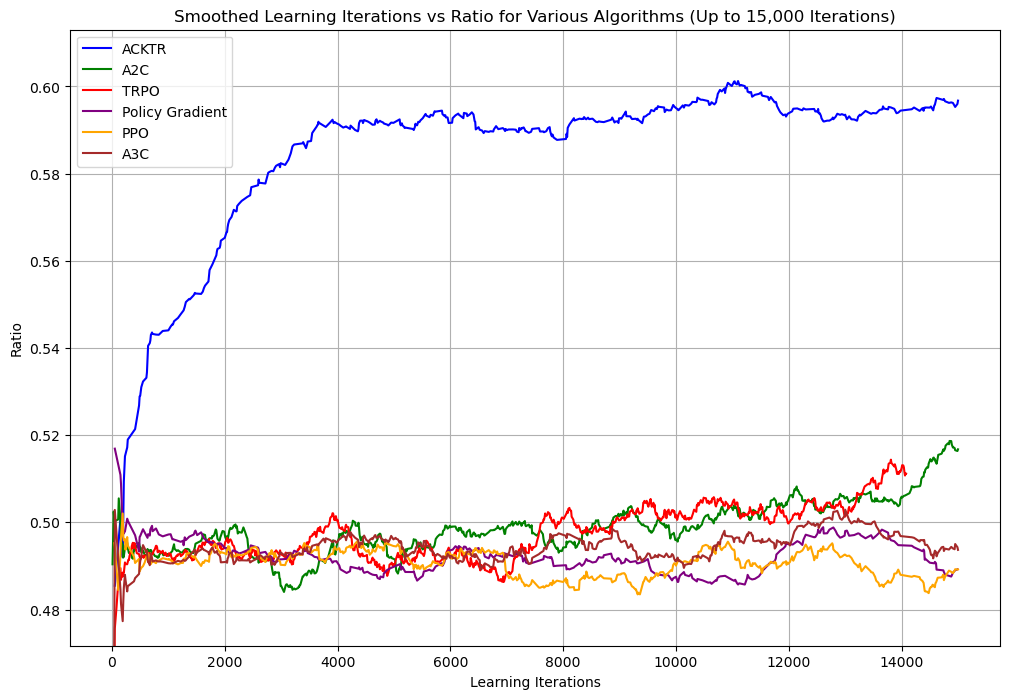

In [3]:
# 이전 코드에서의 모든 설정들을 그대로 유지합니다.

# 그래프 초기화
plt.figure(figsize=(12, 8))

# y축 값 범위를 조절하기 위한 초기 설정
min_y, max_y = float('inf'), float('-inf')

# 데이터 로드 및 플롯
for file_path, algorithm, color in zip(file_paths, algorithms, colors):
    data = pd.read_csv(file_path)
    filtered_data = data[data['Step'] <= 15000]  # Step 값이 15000 이하인 데이터만 필터링

    # 이동 평균 계산
    if len(filtered_data) >= window_size:
        smoothed_values = filtered_data['Value'].rolling(window=window_size, min_periods=1).mean()
        
        # 시작 부분의 변동성을 제외하고 y축 범위 계산을 위한 데이터 선택
        # 예를 들어, 처음 100개 데이터 포인트를 제외할 수 있습니다.
        trimmed_data = smoothed_values[100:]
        
        plt.plot(filtered_data['Step'], smoothed_values, label=algorithm, color=color)
        
        # y축 최대/최소값 업데이트
        min_y = min(min_y, trimmed_data.min())
        max_y = max(max_y, trimmed_data.max())
    else:
        plt.plot(filtered_data['Step'], filtered_data['Value'], label=algorithm, color=color)
        min_y = min(min_y, filtered_data['Value'][100:].min())
        max_y = max(max_y, filtered_data['Value'][100:].max())

# y축 범위 설정
padding = (max_y - min_y) * 0.1  # 데이터 범위의 10%를 패딩으로 추가
plt.ylim(min_y - padding, max_y + padding)

# 제목과 범례
plt.title('Smoothed Learning Iterations vs Ratio for Various Algorithms (Up to 15,000 Iterations)')
plt.xlabel('Learning Iterations')
plt.ylabel('Ratio')
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()